In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import json


In [17]:
jagglar_rate_path = r"C:\python\dataOnline\anaslo_02\json\jagglar_rate.json"
with open(jagglar_rate_path, "r", encoding="utf-8") as f:
    MODEL_DATA_DICT = json.load(f)
MODEL_DATA_DICT["ゴーゴージャグラー3"]["5"]
MODEL_DATA_DICT["ゴーゴージャグラー3"]["grape_contents"]

{'bb': 239.0,
 'rb': 95.0,
 'replay': 0.411,
 'cherryOff': 0.0661,
 'cherryOn': 0.0372}

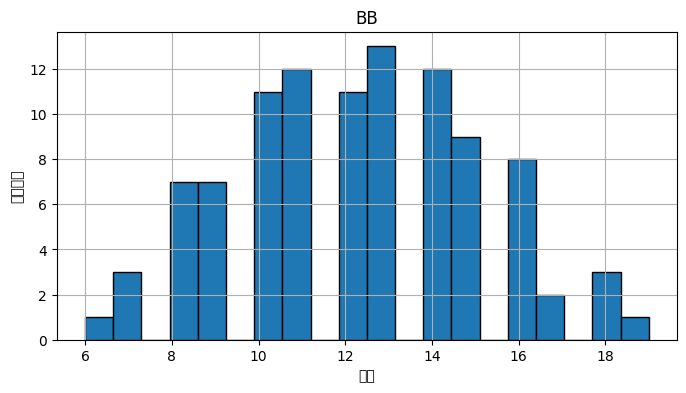

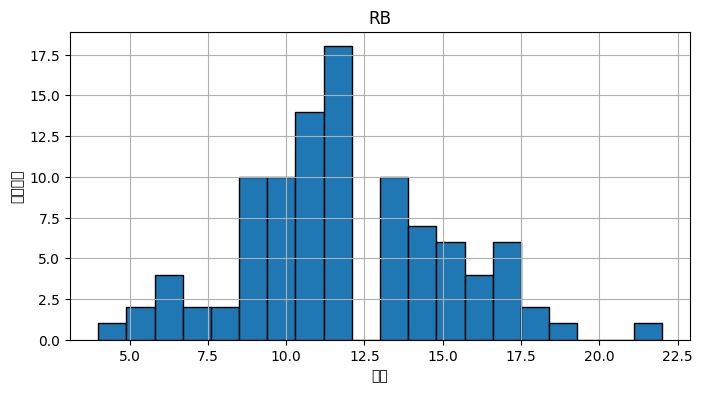

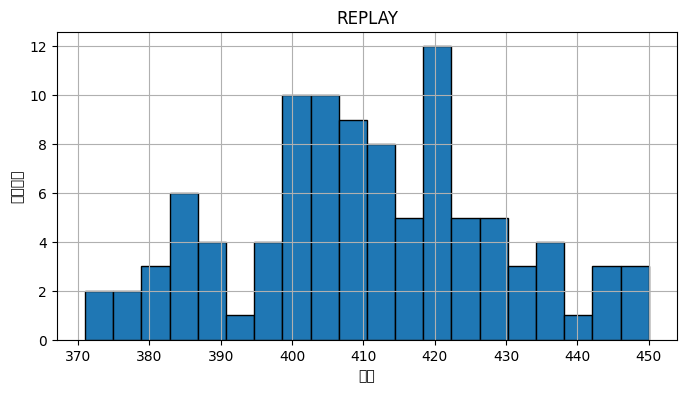

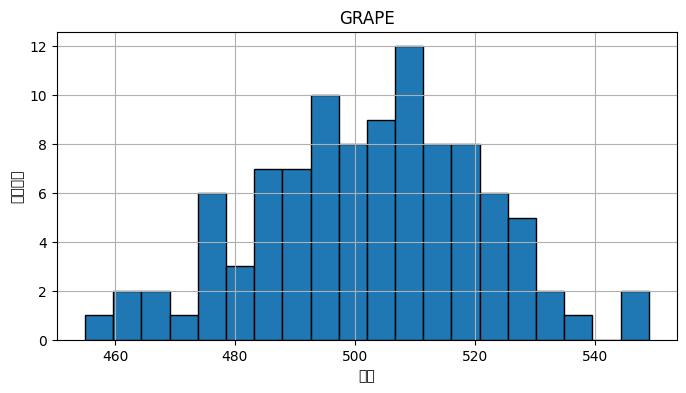

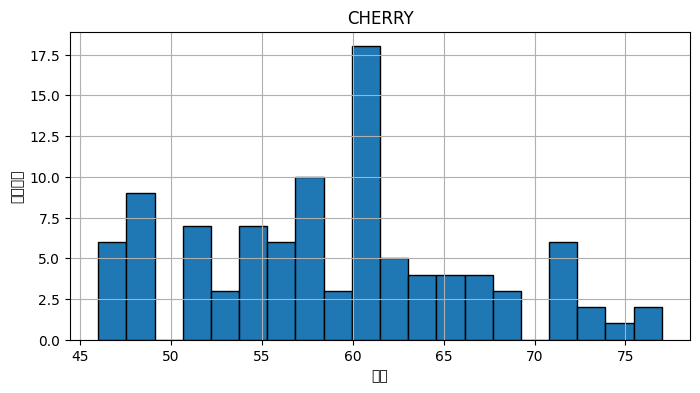

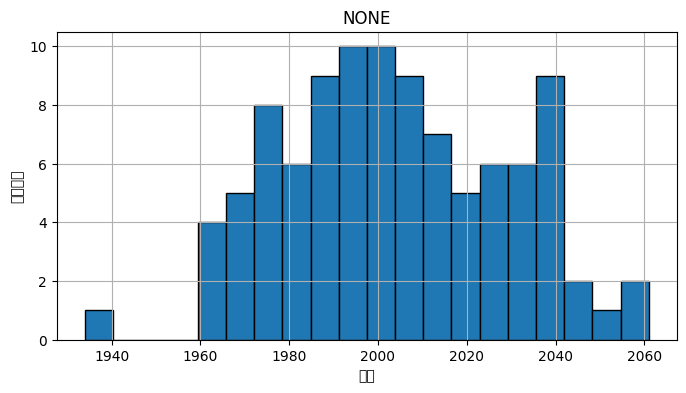

In [ ]:

# パラメータ設定
total_games = 3000
num_trials = 100  # 100回実行

bb_probability = 1 / 247.3
# bb_probability = 1/ float(MODEL_DATA_DICT["ゴーゴージャグラー3"]["5"]["BB_RATE"].replace("1/", ""))
rb_probability = 1 / 247.3
# rb_probability = 1/ float(MODEL_DATA_DICT["ゴーゴージャグラー3"]["5"]["RB_RATE"].replace("1/", ""))
replay_probability  = 1 / 7.3
# replay_probability  = float(MODEL_DATA_DICT["ゴーゴージャグラー3"]["grape_contents"]["replay"])
grape_probability   = 1 / 6.0
cherry_probability  = 1 / 50.0
# cherry_probability  = float(MODEL_DATA_DICT["ゴーゴージャグラー3"]["grape_contents"]["cherryOff"])

# 結果カウント用
bb_count = 0
rb_count = 0
replay_count = 0
grape_count = 0
cherry_count = 0
miss_count = 0

# 累積確率の計算
bb_threshold = bb_probability
rb_threshold = bb_threshold + rb_probability
replay_threshold = rb_threshold + replay_probability
grape_threshold = replay_threshold + grape_probability
cherry_threshold = grape_threshold + cherry_probability
# 残りはハズレ → cherry_threshold 〜 1.0

# 結果を保存するリスト
bb_results = []
rb_results = []
replay_results = []
grape_results = []
cherry_results = []
miss_results = []

# 100回実行ループ
for trial in range(num_trials):
    # カウンター初期化
    bb_count = 0
    rb_count = 0
    replay_count = 0
    grape_count = 0
    cherry_count = 0
    miss_count = 0
    
    # 1 trial = total_games 回回す
    for _ in range(total_games):
        rand_val = random.random()
        
        if rand_val < bb_threshold:
            bb_count += 1
        elif rand_val < rb_threshold:
            rb_count += 1
        elif rand_val < replay_threshold:
            replay_count += 1
        elif rand_val < grape_threshold:
            grape_count += 1
        elif rand_val < cherry_threshold:
            cherry_count += 1
        else:
            miss_count += 1
    
    # 各回の結果を記録
    bb_results.append(bb_count)
    rb_results.append(rb_count)
    replay_results.append(replay_count)
    grape_results.append(grape_count)
    cherry_results.append(cherry_count)
    miss_results.append(miss_count)
    

# ヒストグラム表示関数
def plot_hist(data, title):
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel("回数")
    plt.ylabel("試行回数")
    plt.grid(True)
    plt.show()

# 各役ごとの分布を表示
plot_hist(bb_results, "BB")
plot_hist(rb_results, "RB")
plot_hist(replay_results, "REPLAY")
plot_hist(grape_results, "GRAPE")
plot_hist(cherry_results, "CHERRY")
plot_hist(miss_results, "NONE")

c:\python\dataOnline\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python\dataOnline\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


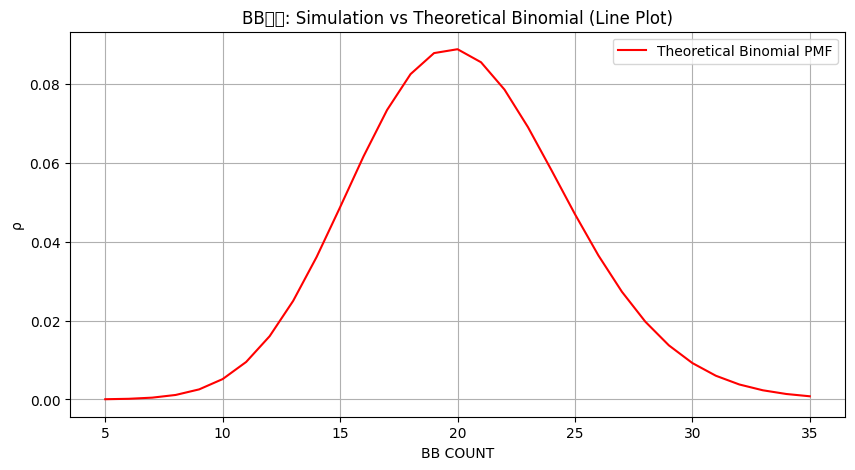

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# パラメータ設定
total_games = 5000
num_trials = 100  # 100回実行

# BB確率
bb_probability = 1 / 247.3

# BB結果リスト
bb_results = []

# 100回実行ループ
for trial in range(num_trials):
    bb_count = 0
    
    for _ in range(total_games):
        rand_val = random.random()
        
        if rand_val < bb_probability:
            bb_count += 1
    
    bb_results.append(bb_count)

# 理論PMF 計算
x_min = min(bb_results) - 5
x_max = max(bb_results) + 5
x = np.arange(x_min, x_max + 1)

pmf = binom.pmf(x, n=total_games, p=bb_probability)
plt.figure(figsize=(10, 5))

plt.plot(x, pmf, '-', label='Theoretical Binomial PMF', color='red')

plt.title('BB分布: Simulation vs Theoretical Binomial (Line Plot)')
plt.xlabel('BB COUNT')
plt.ylabel('ρ')
plt.legend()
plt.grid(True)
plt.show()


c:\python\dataOnline\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python\dataOnline\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python\dataOnline\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python\dataOnline\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


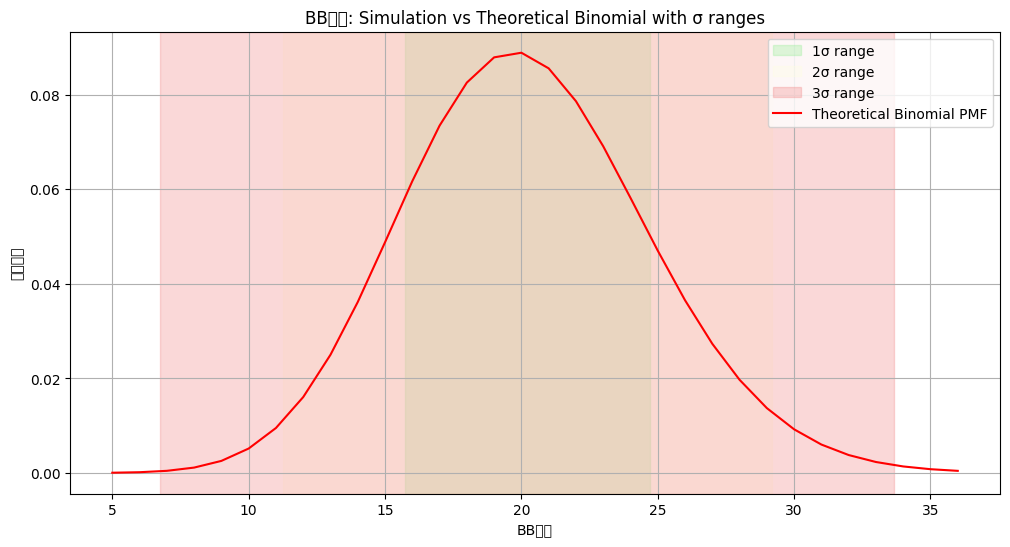

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# パラメータ設定
total_games = 5000
num_trials = 100  # 100回実行

# BB確率
bb_probability = 1 / 247.3

# BB結果リスト
bb_results = []

# 100回実行ループ
for trial in range(num_trials):
    bb_count = 0
    
    for _ in range(total_games):
        rand_val = random.random()
        
        if rand_val < bb_probability:
            bb_count += 1
    
    bb_results.append(bb_count)

# 理論PMF 計算
x_min = min(bb_results) - 5
x_max = max(bb_results) + 5
x = np.arange(x_min, x_max + 1)

pmf = binom.pmf(x, n=total_games, p=bb_probability)

# サンプルデータ → ヒストグラムの高さを求める
hist_counts, bin_edges = np.histogram(bb_results, bins=np.arange(x_min - 0.5, x_max + 1.5, 1), density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 理論平均と標準偏差
mu = total_games * bb_probability
sigma = np.sqrt(total_games * bb_probability * (1 - bb_probability))

# 1σ, 2σ, 3σ 範囲
sigma_ranges = [
    (mu - sigma, mu + sigma),
    (mu - 2*sigma, mu + 2*sigma),
    (mu - 3*sigma, mu + 3*sigma)
]

# グラフ描画
plt.figure(figsize=(12, 6))

# 1σ, 2σ, 3σの範囲を色付け
colors = ['lightgreen', 'lightyellow', 'lightcoral']
labels = ['1σ range', '2σ range', '3σ range']
for i, (low, high) in enumerate(sigma_ranges):
    plt.axvspan(low, high, color=colors[i], alpha=0.3, label=labels[i])

# サンプル結果を線でプロット
# plt.plot(bin_centers, hist_counts, 'o-', label='Simulation (100 trials)', color='blue')

# 理論PMFを線でプロット
plt.plot(x, pmf, '-', label='Theoretical Binomial PMF', color='red')

plt.title('BB分布: Simulation vs Theoretical Binomial with σ ranges')
plt.xlabel('BB回数')
plt.ylabel('確率密度')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
n = 2000
p = 1 / 247.3 * 2
print(p)
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5
print(sigma)
for i in range(1, 5):
    print(f'{n /(mu + i * sigma), n/(mu - i * sigma)}')

0.008087343307723413
4.005480791602036
(99.10720558747232, 164.34926230610102)
(82.69366955033945, 244.98620324679845)
(70.94430310653748, 480.9722287240712)
(62.11834145119027, 13092.136977697766)


In [6]:
from scipy.stats import binom

# パラメータ
n = total_games
p = bb_probability

n = 3000
p = 1 / 247.3

# 対象とする範囲（中央％を残す → 上下のパーセンタイル）
ranges_percentiles = {
    "50%": (0.25, 0.75),
    "60%": (0.20, 0.80),
    "70%": (0.15, 0.85),
    "80%": (0.10, 0.90),
    "90%": (0.05, 0.95)
}

# 範囲を計算
range_values = {}

for label, (low_q, high_q) in ranges_percentiles.items():
    low_value = binom.ppf(low_q, n=n, p=p)
    high_value = binom.ppf(high_q, n=n, p=p)
    range_values[label] = (low_value, high_value)

# 結果出力
for label, (low, high) in range_values.items():
    print(f"{label} 範囲: {low:.0f} ～ {high:.0f} 回")


# 結果格納
range_probabilities = {}

for label, (low_q, high_q) in ranges_percentiles.items():
    low_hits = binom.ppf(low_q, n=n, p=p)
    high_hits = binom.ppf(high_q, n=n, p=p)
    
    low_prob = low_hits / n
    high_prob = high_hits / n
    
    range_probabilities[label] = (low_prob, high_prob)

# 結果表示
for label, (low, high) in range_probabilities.items():
    print(f"{label} 確率範囲: {1/low:.1f} ～ {1/high:.1f}")


50% 範囲: 10 ～ 14 回
60% 範囲: 9 ～ 15 回
70% 範囲: 9 ～ 16 回
80% 範囲: 8 ～ 17 回
90% 範囲: 7 ～ 18 回
50% 確率範囲: 300.0 ～ 214.3
60% 確率範囲: 333.3 ～ 200.0
70% 確率範囲: 333.3 ～ 187.5
80% 確率範囲: 375.0 ～ 176.5
90% 確率範囲: 428.6 ～ 166.7


In [141]:
import math
from scipy.stats import norm


def new_func(n, p, confidence_level):
    # 計算
    SE = math.sqrt(p * (1 - p) / n)
    # zスコア
    z = norm.ppf(1 - (1 - confidence_level) / 2)
    # 信頼区間
    lower_bound = p - z * SE
    upper_bound = p + z * SE

    # 出力
    print(f"母比率分母 {1/p:.2f}")
    # print(f"Z値 {z:.5f}")
    print(f"試行回数 {n} 回")
    # print(f"試行回数 {n} 回の標準誤差 {SE:.5f}")
    # print(f"母比率の {confidence_level*100:.0f}% 信頼区間 (確率ベース): {lower_bound:.5f} ～ {upper_bound:.5f}")
    print(f"母比率の {confidence_level*100:.0f}% 信頼区間 (1/確率表記): {1/lower_bound:.2f} ～ {1/upper_bound:.2f}")
    
    return SE,lower_bound,upper_bound


# 母比率
p1 = 253 / 2**16
p2 = 254 / 2**16
p3 = 255 / 2**16
p4 = 258 / 2**16
p5 = 265 / 2**16
p6 = 279 / 2**16

# 母比率
p1 = 438 / 2**16
p2 = 451 / 2**16
p3 = 469 / 2**16
p4 = 502 / 2**16
p5 = 530 / 2**16
p6 = 558 / 2**16

# 試行数
n = 5000
# 95%信頼区間
confidence_level = 0.9
for n in range(1000, 6000, 1000):
    for p in [p5]:
        SE, lower_bound, upper_bound = new_func(n, p, confidence_level)


母比率分母 123.65
試行回数 1000 回
母比率の 90% 信頼区間 (1/確率表記): 291.67 ～ 78.46
母比率分母 123.65
試行回数 2000 回
母比率の 90% 信頼区間 (1/確率表記): 208.64 ～ 87.86
母比率分母 123.65
試行回数 3000 回
母比率の 90% 信頼区間 (1/確率表記): 185.27 ～ 92.79
母比率分母 123.65
試行回数 4000 回
母比率の 90% 信頼区間 (1/確率表記): 173.68 ～ 96.00
母比率分母 123.65
試行回数 5000 回
母比率の 90% 信頼区間 (1/確率表記): 166.56 ～ 98.32


回転数 : 1000, 確率分母 : 123.7
平均当選回数 μ : 8.1
標準偏差 σ : 2.8
1σ : 5.3
2σ : 2.4


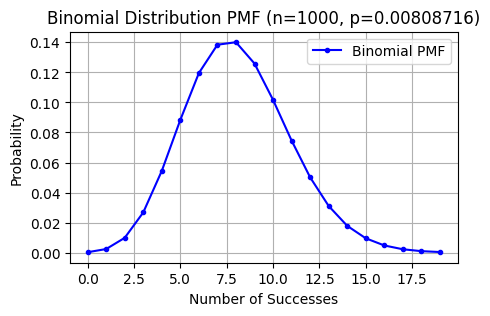

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# パラメータ
n = 1000
p = 530 / (2 ** 16)

# x軸範囲（観測されうる回数の範囲を広めにとる）
# 理論平均 μ = n * p
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# x軸は μ ± 4σ 程度まで表示
x_min = int(max(0, mu - 4 * sigma))
x_max = int(mu + 4 * sigma)
x = np.arange(x_min, x_max + 1)

# PMF計算
pmf = binom.pmf(x, n, p)

print(f"回転数 : {n}, 確率分母 : {1/p:.1f}")
print(f"平均当選回数 μ : {mu:.1f}")
print(f"標準偏差 σ : {sigma:.1f}")
for i in range(1, 3):
    print(f"{i}σ : {mu - i * sigma:.1f}")

# グラフ描画
plt.figure(figsize=(5, 3))
plt.plot(x, pmf, '.-', color='blue', label='Binomial PMF')
plt.title(f'Binomial Distribution PMF (n={n}, p={p:.8f})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()


In [177]:
# パラメータ
n = 1000
p = 530 / (2 ** 16)

for n in range(1000, 6000, 1000):
    mu = n * p
    sigma = np.sqrt(n * p * (1 - p))
    print(f"回転数 : {n}, 確率分母 : {1/p:.1f}")
    print(f"平均当選回数 μ : {mu:.1f}")
    print(f"標準偏差 σ : {sigma:.1f}")
    for i in range(1, 2):
        print(f"{i}σ: {mu - i * sigma:.1f}", end=" ")

回転数 : 1000, 確率分母 : 123.7
平均当選回数 μ : 8.1
標準偏差 σ : 2.8
1σ: 5.3 回転数 : 2000, 確率分母 : 123.7
平均当選回数 μ : 16.2
標準偏差 σ : 4.0
1σ: 12.2 回転数 : 3000, 確率分母 : 123.7
平均当選回数 μ : 24.3
標準偏差 σ : 4.9
1σ: 19.4 回転数 : 4000, 確率分母 : 123.7
平均当選回数 μ : 32.3
標準偏差 σ : 5.7
1σ: 26.7 回転数 : 5000, 確率分母 : 123.7
平均当選回数 μ : 40.4
標準偏差 σ : 6.3
1σ: 34.1 